In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./cleaned_dataset.csv")

Set the Target variable and Feature set

In [3]:
# target variable
y = df["CRASH_COUNT"]  
# feature set
X = df.drop(columns=["CRASH_COUNT", "CRASH_RECORD_ID", "LANE_CNT"])
# feature set it left with: Crash_hour, Day_of_week, crash_month, speed_limit, crash_year, weather_condition, road_surface_condition, + crash date to be used for visualizations later

Split the data into the training set and testing set with an 80/20 split.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

test_dates = X_test['CRASH_DATE']

X_test = X_test.drop(columns=['CRASH_DATE'])
X_train = X_train.drop(columns=['CRASH_DATE'])
X_test = pd.get_dummies(X_test, drop_first=False)
X_train = pd.get_dummies(X_train, drop_first=False)

In [7]:
# models
model_LR = LinearRegression()
# model_RF = RandomForestRegressor(n_estimators=100, random_state=42)
model_xgb = XGBRegressor(n_estimators=300, random_state=42)

# train the models
trained_model_LR = model_LR.fit(X_train, y_train)
print("Linear Regression model trained.")
# trained_model_RF = model_RF.fit(X_train, y_train)
# print("Random Forest model trained.")
trained_model_xgb = model_xgb.fit(X_train, y_train)
print("XGBoost model trained.")

# commented out random forest due to very long train time and poor performance

Linear Regression model trained.
XGBoost model trained.


In [24]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2, y_pred

# evaluation results
results = {}
mae, rmse, r2, y_pred_LR = evaluate_model(trained_model_LR, X_test, y_test)
results["Linear Regression"] = {"MAE": mae, "RMSE": rmse, "R2": r2}

mae, rmse, r2, y_pred_XGB = evaluate_model(trained_model_xgb, X_test, y_test)
results["XGBoost"] = {"MAE": mae, "RMSE": rmse, "R2": r2}

results


{'Linear Regression': {'MAE': 45.63099717890736,
  'RMSE': 59.43035680811059,
  'R2': 0.14018380705380729},
 'XGBoost': {'MAE': 22.847625732421875,
  'RMSE': 31.494211196899414,
  'R2': 0.7585370540618896}}

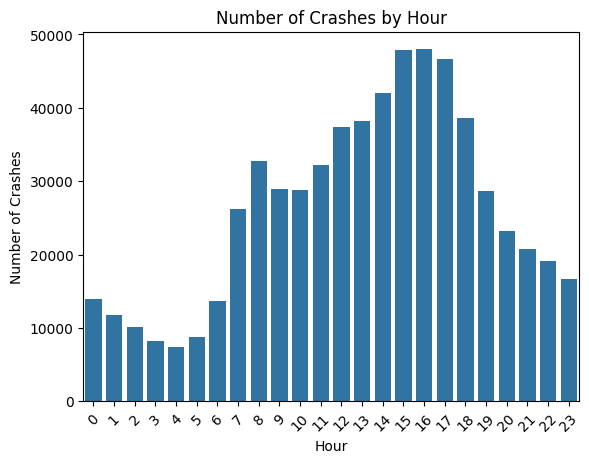

In [9]:
# Crashes by hour
sns.countplot(data=df, x='CRASH_HOUR')
plt.title('Number of Crashes by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.show()

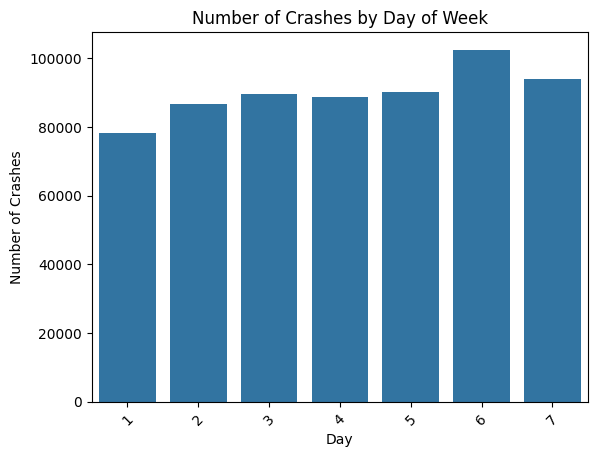

In [10]:
# Crashes per day of Week   Day 1 = Sunday
sns.countplot(data=df, x='CRASH_DAY_OF_WEEK')
plt.title('Number of Crashes by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.show()

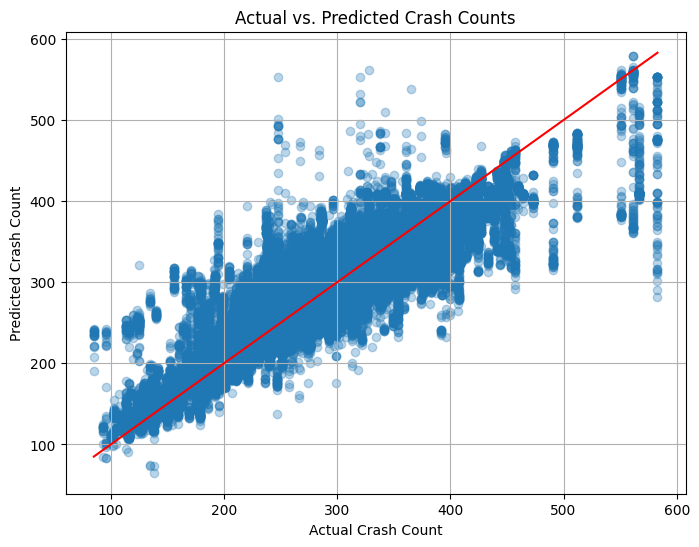

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_XGB, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.xlabel('Actual Crash Count')
plt.ylabel('Predicted Crash Count')
plt.title('Actual vs. Predicted Crash Counts')
plt.grid(True)
plt.show()


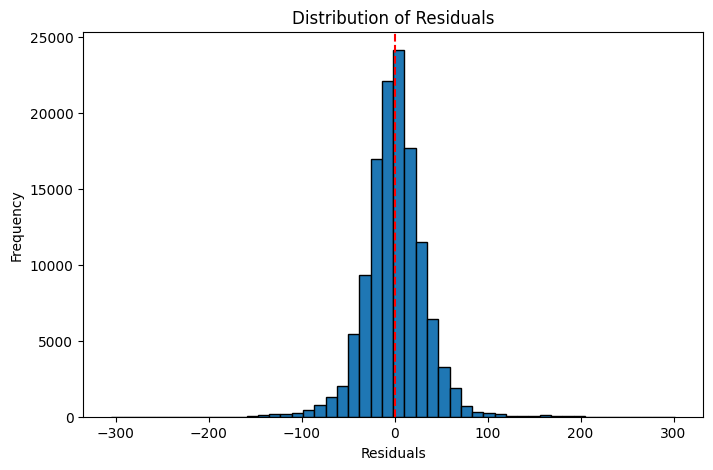

In [16]:
residuals = y_test - y_pred_XGB

plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=50, edgecolor='black')
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

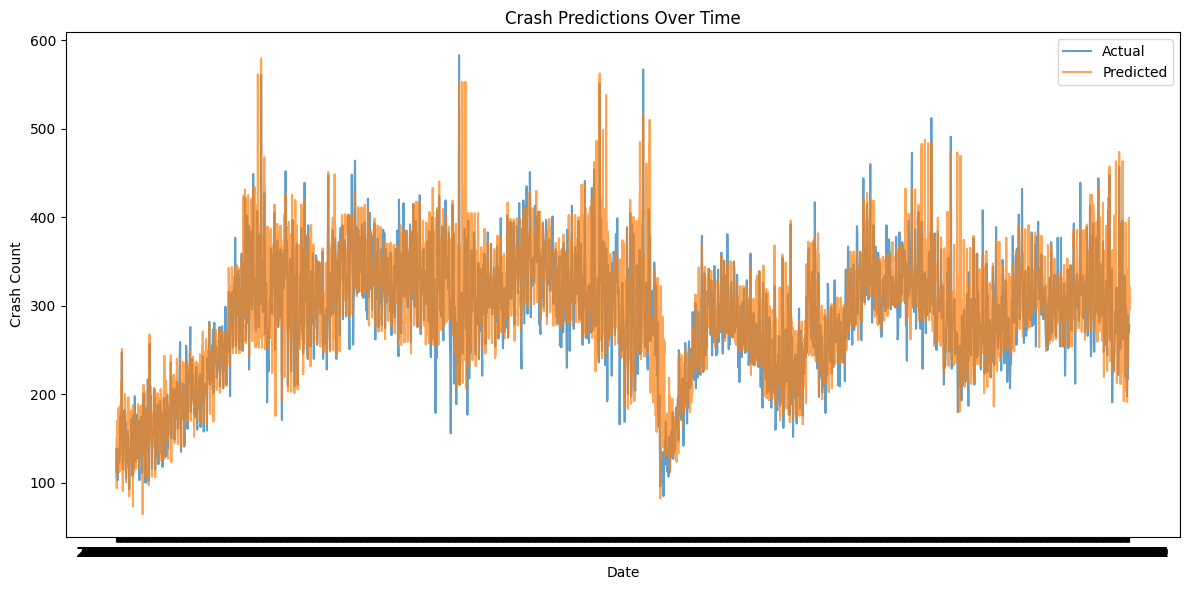

In [ ]:
comparison_df = pd.DataFrame({
    'Date': test_dates,
    'Actual': y_test,
    'Predicted': y_pred_XGB
})

comparison_df = comparison_df.sort_values('Date')

plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Date'], comparison_df['Actual'], label='Actual', alpha=0.7)
plt.plot(comparison_df['Date'], comparison_df['Predicted'], label='Predicted', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Crash Count')
plt.title('Crash Predictions Over Time')
plt.legend()
plt.tight_layout()
plt.show()